In [1]:
# Імпорт необхідних бібліотек
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

x_train original shape (50000, 32, 32, 3)
y_train original shape (50000, 1)


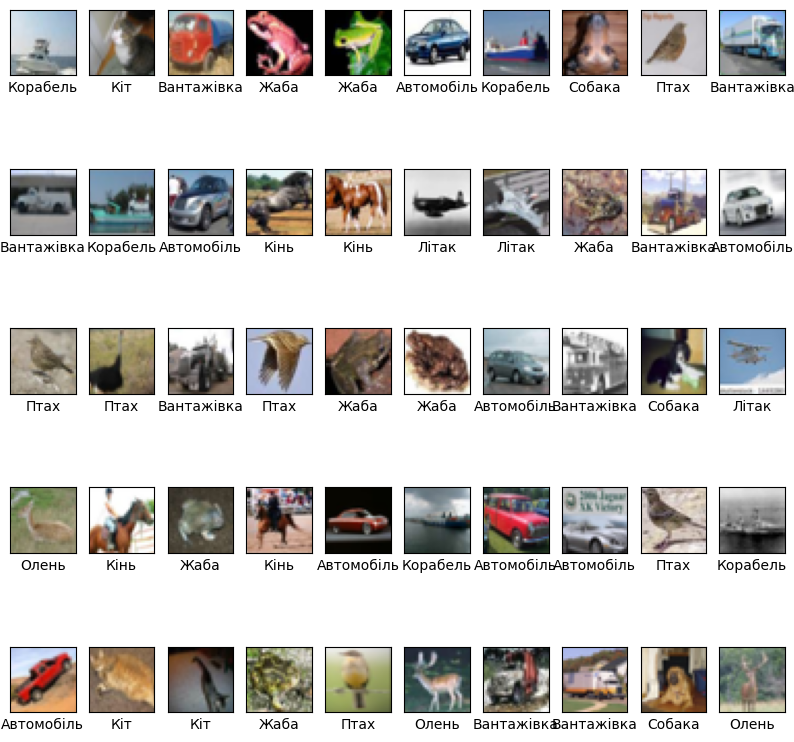

In [2]:
# Завантаження та розділення датасету

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
#(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print("x_train original shape", x_train.shape)
print("y_train original shape", y_train.shape)

classes = ["Літак", "Автомобіль", "Птах", "Кіт", "Олень", "Собака", "Жаба", "Кінь", "Корабель", "Вантажівка"]


plt.figure(figsize=(10,10))
for i in range(100,150):
    plt.subplot(5,10,i-100+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    
    # Отримання скалярного значення з y_train
    class_index = int(y_train[i])
    
    plt.xlabel(classes[class_index])



In [3]:
# Нормалізація даних
x_train = x_train/255.0
x_test = x_test/255.0

# Перетворення міток в категоріальні дані
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [4]:
model = keras.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(256, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(10, activation="softmax")
])


# Компіляція моделі
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Виведення інформації про модель
model.summary()

# Тренування моделі
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 256)               786688    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 830,250
Trainable params: 830,250
Non-trai

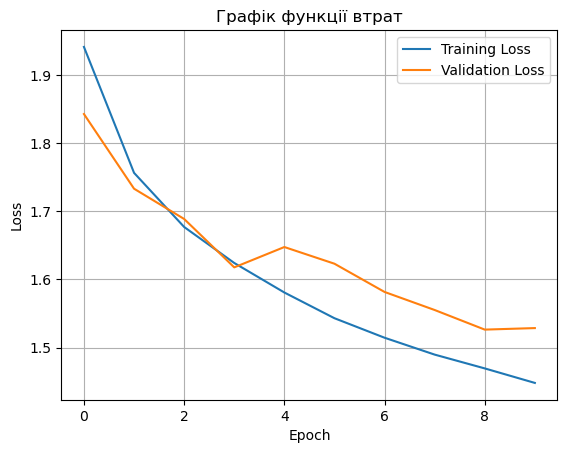

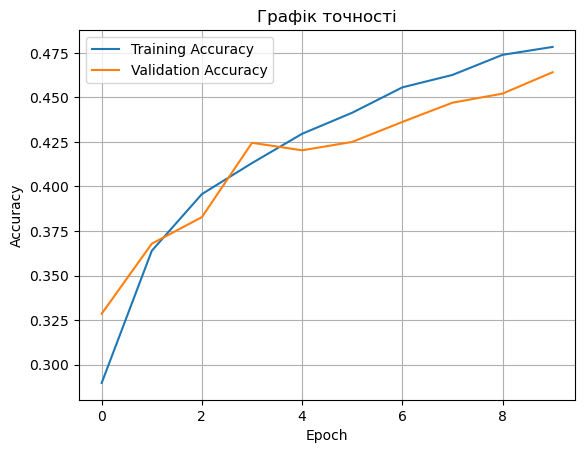

In [5]:
# Виведення графіків функції втрат та точності
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Графік функції втрат")
plt.legend()
plt.grid()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("Графік точності")
plt.grid()
plt.legend()
plt.show()

313/313 - 1s - loss: 1.5011 - accuracy: 0.4684 - 630ms/epoch - 2ms/step

Test Accuracy: 46.84%
1/1 [==============================] - 0s 137ms/step
Image 1: Predicted Class 7, True Class 3
Image 2: Predicted Class 4, True Class 4
Image 3: Predicted Class 5, True Class 5
Image 4: Predicted Class 3, True Class 3
Image 5: Predicted Class 0, True Class 7
Image 6: Predicted Class 6, True Class 5
Image 7: Predicted Class 3, True Class 3
Image 8: Predicted Class 1, True Class 1
Image 9: Predicted Class 6, True Class 6
Image 10: Predicted Class 9, True Class 3


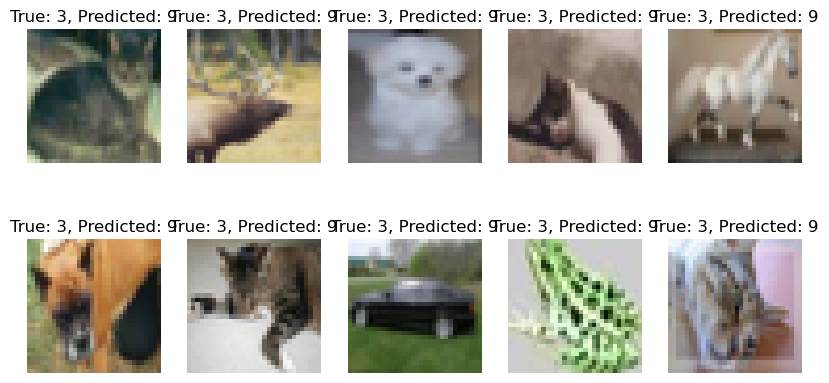

In [6]:
# Оцінка точності на тестовому наборі
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest Accuracy: {test_accuracy*100:.2f}%")

# Розпізнавання 10 випадкових зображень
random_indices = np.random.choice(x_test.shape[0], 10, replace=False)
random_images = x_test[random_indices]
predictions = model.predict(random_images)

# Виведення результатів розпізнавання
for i in range(10):
    predicted_class = np.argmax(predictions[i])
    true_class = np.argmax(y_test[random_indices[i]])
    print(f"Image {i + 1}: Predicted Class {predicted_class}, True Class {true_class}")

# Виведення зображень для перевірки
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(random_images[i], cmap='gray')
    plt.title(f"True: {true_class}, Predicted: {predicted_class}")
    plt.axis('off')
plt.show()

In [7]:
# Виведення статистики моделі
print("\nModel Evaluation:")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

# Статистика параметрів моделі
total_parameters = sum([np.prod(layer.get_weights()[i].shape) for layer in model.layers for i in range(len(layer.get_weights()))])

print(f"\nTotal Parameters: {total_parameters}")

# Статистика шарів моделі
for i, layer in enumerate(model.layers):
    print(f"\nLayer {i + 1}: {layer.name}")
    print(f"Number of Parameters: {layer.count_params()}")
    print(f"Input Shape: {layer.input_shape}, Output Shape: {layer.output_shape}")



Model Evaluation:
Test Loss: 1.5011
Test Accuracy: 46.84%

Total Parameters: 830250

Layer 1: flatten
Number of Parameters: 0
Input Shape: (None, 32, 32, 3), Output Shape: (None, 3072)

Layer 2: dense
Number of Parameters: 786688
Input Shape: (None, 3072), Output Shape: (None, 256)

Layer 3: dense_1
Number of Parameters: 32896
Input Shape: (None, 256), Output Shape: (None, 128)

Layer 4: dense_2
Number of Parameters: 8256
Input Shape: (None, 128), Output Shape: (None, 64)

Layer 5: dense_3
Number of Parameters: 2080
Input Shape: (None, 64), Output Shape: (None, 32)

Layer 6: dense_4
Number of Parameters: 330
Input Shape: (None, 32), Output Shape: (None, 10)


Збільшення кількості шарів та вузлів у шарах.
Використання оптимізаторів та експериментуйти зі швидкістю навчання для оптимізації тренування моделі.
Використання Dropout в шарах для регуляризації та уникнення перенавчання.
Зміна розміру партії, кількість епох, розмір шарів.